    CHAPTER 2 : DATA AND SAMPLING DISTRIBUTIONS

Population means the whole data  .. generally the large data set

Sample means the subset data from the population

Random sampling means that each member of the sample has equal probability to get chosen.

Sampling with replacement means population member that is once chosen for a sample ..  is put back to the population to get another sample and the same population member have chance to get chosen once again

Sampling concept is used in cross validation step to get sample of random or stratified sampling

Dividing the population into strata and randomly sampling from each strata.(strata means homogenous subgroup of population with common characteristics)

Bias-means leaning towards some representation which does not represent the population correctly 
for example taking only feedback from the rich.. deviates from population as it contains poor and middle class people

    BIAS

Statistical bais refer to the  sampling error that are systematic that is produced by the measurement process(taking feedback from only the rich) or by bias error occuring through the sampling(feedback is taken from all but the sampling is done such that it contains on ly rich people)

Random sampling error is also an error but there is no systematic pattern to it

     Quality vs quantity 

Always try to prefer the quality data over the quantity data

A true big data problem is like search engine of google where more queries(quiers are stored as a records) helps to give out better results

myu- Greek symbol is the mean of the population
x bar is the symbol tht represents the mean of the sample 

     Sampling Distribution of a statistic

Sample Statistic - here it means that metric used that cn be mean , median , or standard deviation

Data Distribution - frequency distribution of the each value of the dataset

Sampling distribution- frequency distribution of some sample statistic( like standard deviation, mean) drawn over many sample set or resamples from the same popultion

Typically the model is built from the samples and not from the population 

There might be some error in the model as it is based on the sample that is trained on ,We can evaluate the performance by testing out from the different sample set

Here we will prove that plot of original data plot is more skewed positively(right side)

The distribution of a sample statistic such as the mean is likely to be more regular and bell-shaped than the distribution of the data itself. 

The larger the sample the statistic is based on, the more it is normal or bell shaped curve . Also, the larger the sample, the narrower the distribution of the sample statistic.

In [2]:
import pandas as pd
import seaborn as sns

In [7]:
path='/home/anish/plan/practical_statistics_notes/data/loans_income.csv'
loans_income=pd.read_csv(path)
loans_income=loans_income

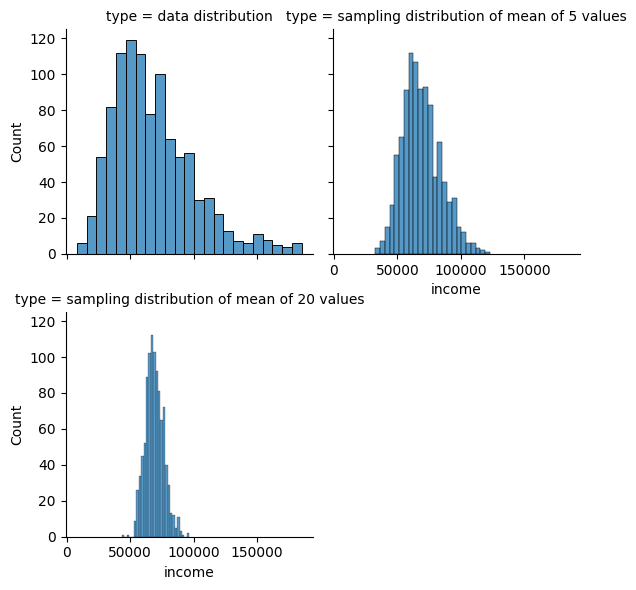

In [6]:
data_sample=pd.DataFrame({'income':loans_income.x.sample(1000),'type': 'data distribution'})

m5=[loans_income.x.sample(5).mean() for _ in range(1000)]
mean_5=pd.DataFrame({'income':m5,'type':'sampling distribution of mean of 5 values'})

m20=[loans_income.x.sample(20).mean() for _ in range(1000)]
mean_20=pd.DataFrame({'income':m20,'type':'sampling distribution of mean of 20 values'})

res=pd.concat([data_sample,mean_5,mean_20])
gridplot=sns.FacetGrid(res,col='type',col_wrap=2)

gridplot.map(sns.histplot,'income',)

     Central limit theorem - 

Tendency of a sampling distribution to take normal or bell shaped curve

The phenomenon from above graph is termed the central limit theorem. It says that the means drawn from multiple samples will resemble the 
familiar bell-shaped normal curve

Standard deviation -measure of the variablity of indivisual data points 

Standard error - measure of variability of the different sample set i.e this mesures how similar is the two samples taken from same population

It is measured by calculating standard deviation of the indivisual data points in a sample set adn divide it by root of the number of samples
standard error =s/root(n)

    Bootstrap sample
A sample taken with replacement from an observed data set.
   
    Resampling
The process of taking repeated samples from observed data; includes both boot‐
strap and permutation (shuffling) procedures.

Bootstrap Statistics:
original: x    62000.0
dtype: float64
sample median: x    62614.9465
dtype: float64
bias: x    614.9465
dtype: float64
std. error: x    8041.642276
dtype: float64


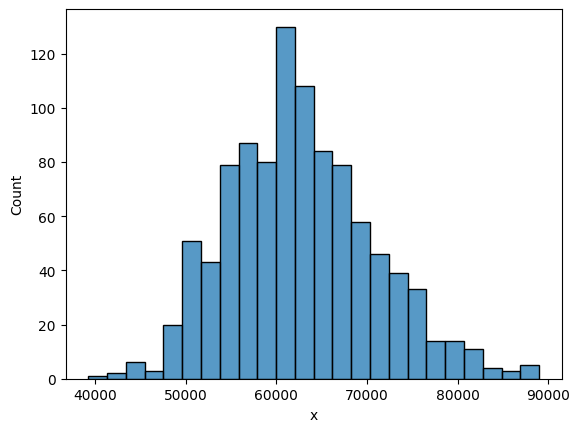

In [22]:
from  sklearn import utils
result =[]
for R in range(1000):
    sample =utils.resample(loans_income,n_samples=20) #resample is sample with replacment 
    result.append(sample.median()) # store the median of each sample taken into array
result=pd.DataFrame(result)
# print(result)
sns.histplot(result.x)

print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'sample median: {result.mean()}')
print(f'bias: {result.mean() - loans_income.median()}')
print(f'standard error of 100 samples of 20 values taken from population: {result.std()}')